In [2]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Automobile_data.csv')

In [5]:
# Display the first five rows of the DataFrame
print(df.head())

   symboling normalized-losses         make  model aspiration num-of-doors  \
0          3                 ?  alfa-romero   2000        std          two   
1          3                 ?  alfa-romero   2000        std          two   
2          1                 ?  alfa-romero   1995        std          two   
3          2               164         audi   1996        std         four   
4          2               164         audi   1997        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm 

In [11]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(205, 26)

In [10]:
# Display summary statistics for the numerical columns in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
model,205.0,2003.229268,6.459612,1995.0,1998.0,2000.0,2011.0,2015.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0


In [12]:
# Display the data types of each column in the DataFrame
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
model                  int64
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [13]:
# Count the number of missing values in each column of the DataFrame
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
model                0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


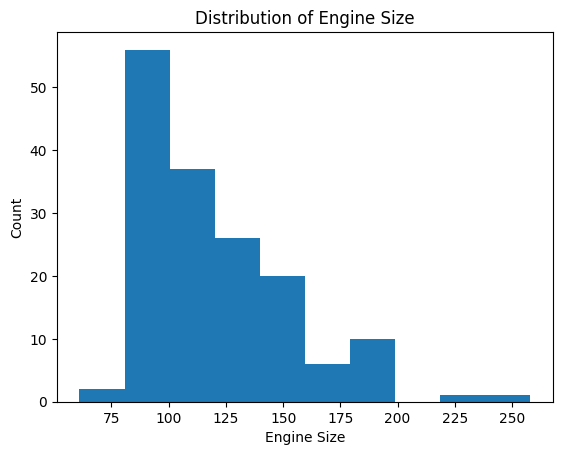

<ipython-input-22-259b9f040227>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


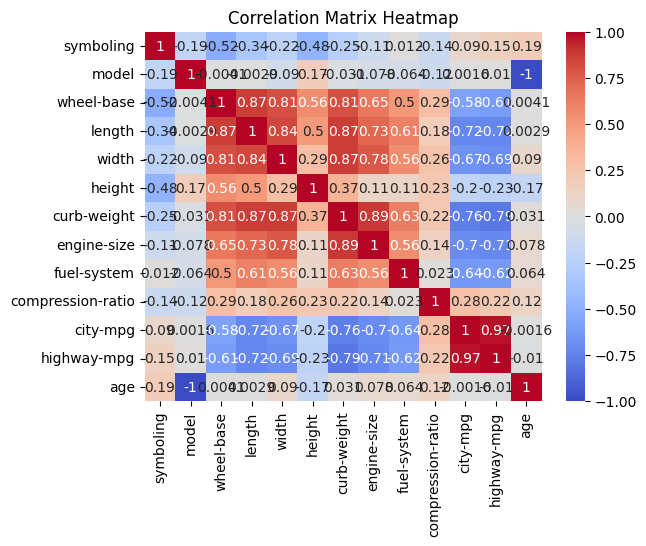

In [22]:
import seaborn as sns

# Sort the data by a specific feature, such as price
df_sorted = df.sort_values(by='price', ascending=False)

# Plot a histogram of a specific feature, such as engine size
plt.hist(df['engine-size'], bins=10)
plt.xlabel('Engine Size')
plt.ylabel('Count')
plt.title('Distribution of Engine Size')
plt.show()

# Compute summary statistics for each numerical feature
summary_stats = df.describe()

# Compute the correlation matrix between features
corr_matrix = df.corr()

# Display a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
from datetime import date
# calculate the age of each car based on its year
today = date.today().year
df['age'] = today - df['model']

In [17]:
# print the dataframe to check the new column was added
print(df.head())

    symboling normalized-losses  make  model aspiration num-of-doors  \
3           2               164  audi   1996        std         four   
4           2               164  audi   1997        std         four   
6           1               158  audi   2001        std         four   
8           1               158  audi   1995      turbo         four   
10          2               192   bmw   2014        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
3       sedan          fwd           front        99.8  ...            7   
4       sedan          4wd           front        99.4  ...            7   
6       sedan          fwd           front       105.8  ...            7   
8       sedan          fwd           front       105.8  ...            7   
10      sedan          rwd           front       101.2  ...            7   

    bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
3   3.19     3.4               10.0      

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define mapping of fuel systems to numbers
fuel_system_mapping = {'1bbl': 1, '2bbl': 2, '3bbl': 3, '4bbl': 4, 'idi': 5, 'mfi':6, 'mpfi':7, 'spdi':8, 'spfi':9}

# Replace fuel systems with numbers
df['fuel-system'] = df['fuel-system'].replace(fuel_system_mapping)

# Replace '?' with NaN
df = df.replace('?', np.nan)

# Drop rows with NaN values
df = df.dropna()


# select features and target variable
X = df[['age', 'fuel-system', 'horsepower']]
y = df['city-mpg']

# perform preprocessing steps (e.g. one-hot encoding, scaling, imputation)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create the linear regression model
lr = LinearRegression()

# train the model on the training set
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 17.153309710398123
R-squared Score: 0.6250500401051451


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


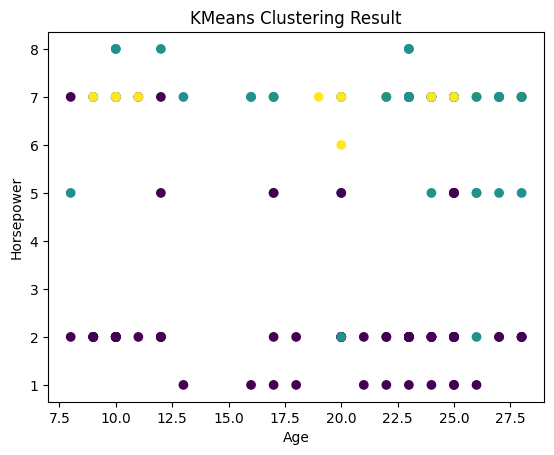

In [19]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# select features
X = df[['age', 'fuel-system', 'horsepower']]

# perform preprocessing steps (e.g. one-hot encoding, scaling, imputation)

# create the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# fit the model on the data
kmeans.fit(X)

# predict the cluster labels for the data
y_pred = kmeans.predict(X)


# plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)
plt.xlabel('Age')
plt.ylabel('Horsepower')
plt.title('KMeans Clustering Result')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# select features and target variable
X = df[['age', 'fuel-system', 'horsepower']]
y = df['city-mpg']

# perform preprocessing steps (e.g. one-hot encoding, scaling, imputation)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create the logistic regression model
lr = LogisticRegression()

# train the model on the training set
lr.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lr.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PATTERN EXPLORATIOIN

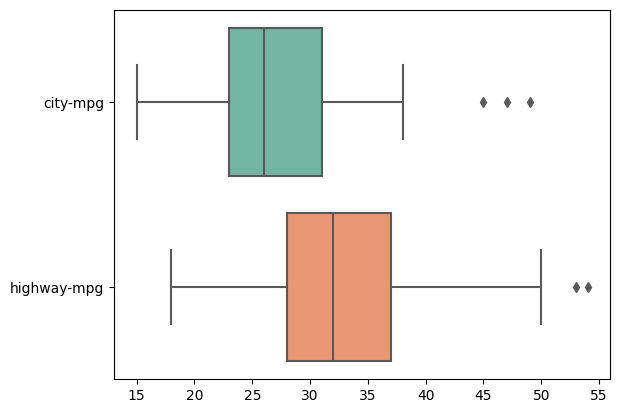

In [32]:
#checking for outliers
'MULTIVARIATE ANALYSIS'
df_ = df[['city-mpg', 'highway-mpg']]
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

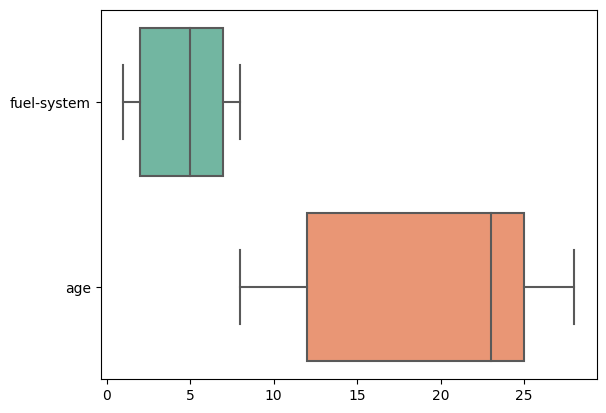

In [35]:
#checking for outliers
'MULTIVARIATE ANALYSIS'
df_ = df[['fuel-system', 'horsepower', 'price', 'age']]
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

Data Cleaning 

In [27]:
# Data Cleaning
"CHECK FOR MISSING VALUES"
#Find the missing values'
df.isnull().sum()


symboling            0
normalized-losses    0
make                 0
model                0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
age                  0
dtype: int64

**Checking data**
  1. Normality (checking univariate normality)

  This is important because several statistic tests rely on this (e.g.    t-statistics).

  2. Homoscedasticity

  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013) . Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

  3. Linearity

  The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.

  4. Absence of correlated errors

  Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this.

<ipython-input-28-1b962b31e0cc>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], fit=norm);


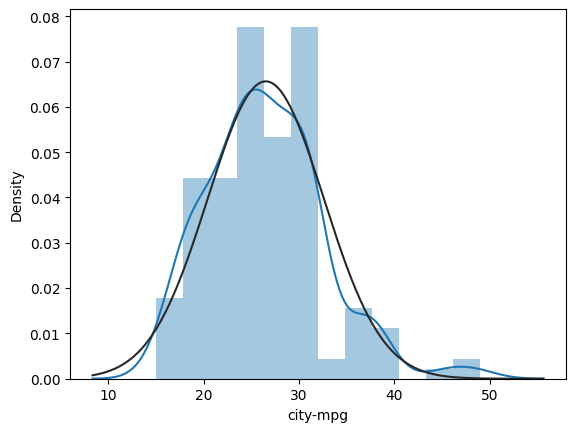

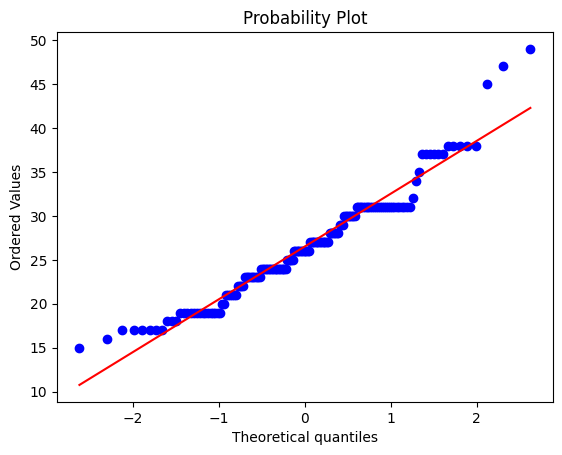

In [28]:
from scipy import stats
from scipy.stats import norm
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Normal probability plot 
# Your code here (test different var)
var = 'city-mpg'
sns.distplot(df[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df[var], plot=plt)

# More about normality tests
# https://michael-fuchs-python.netlify.app/2019/09/13/check-for-normal-distribution/

<ipython-input-29-31baab9db50a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_log[var], fit=norm);


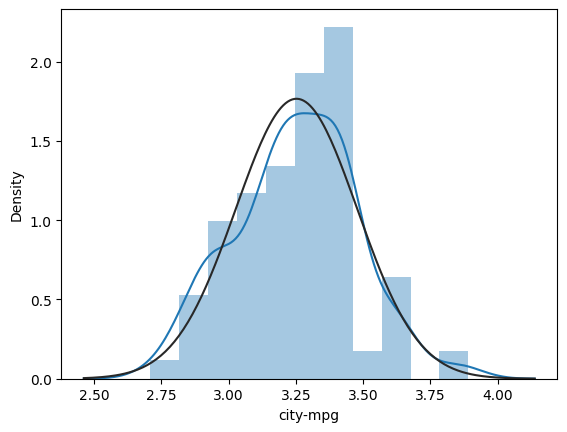

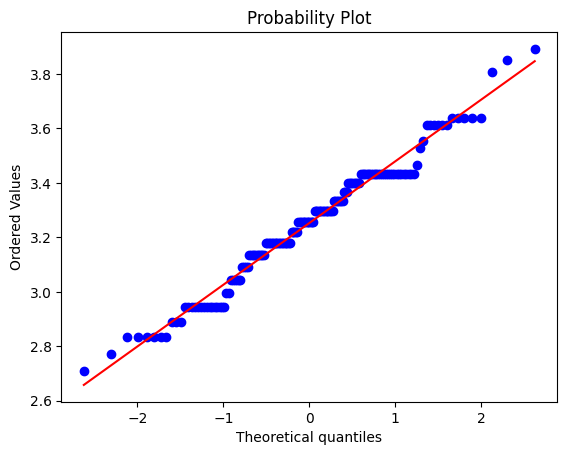

In [29]:
# Doesn't look normal dist
# Applying log transformation ( used for positive skewness dist)
df_log = df.copy()
df_log[var] = np.log(df_log[var])

sns.distplot(df_log[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df_log[var], plot=plt)

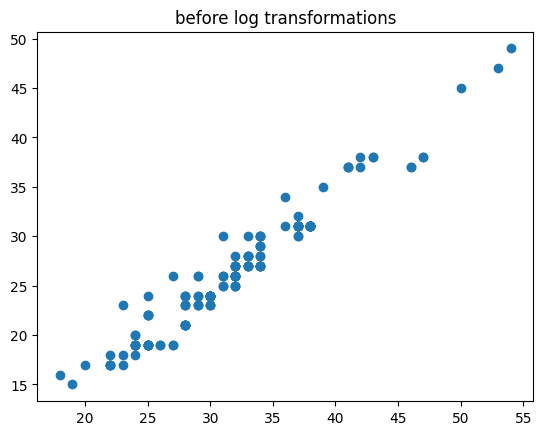

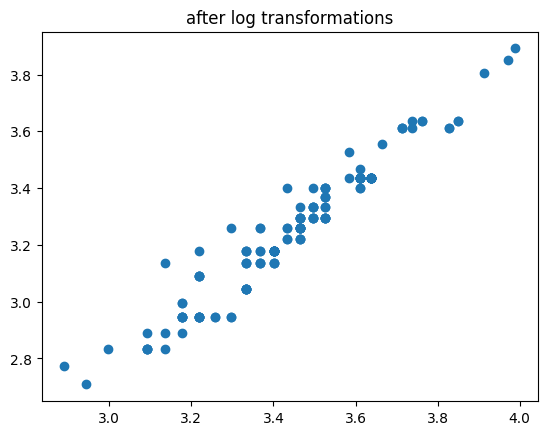

In [26]:
## homoscedasticity
## The best approach to test homoscedasticity for two metric variables is graphically.
df_log = df.copy()
df_log['highway-mpg'] = np.log(df_log["highway-mpg"])
df_log['city-mpg'] = np.log(df_log['city-mpg'])

plt.scatter(df['highway-mpg'], df['city-mpg']);
plt.title('before log transformations')
plt.show()
plt.scatter(df_log['highway-mpg'], df_log['city-mpg']);
plt.title('after log transformations')
plt.show()

# As you can seebelow , the current scatter plot (after log transformation) 
# doesn't have a conic shape anymore. That's the power of normality! 
# Just by ensuring normality in some variables, we solved the homoscedasticity problem.

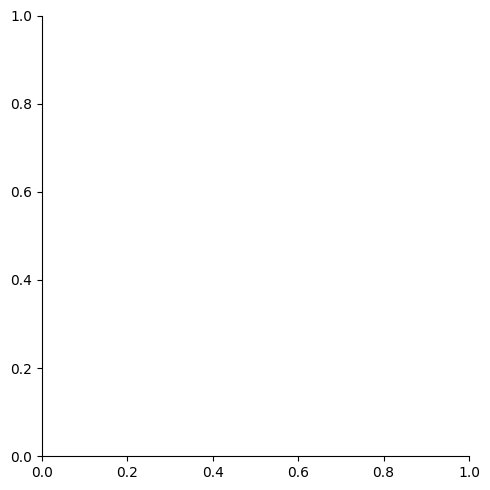

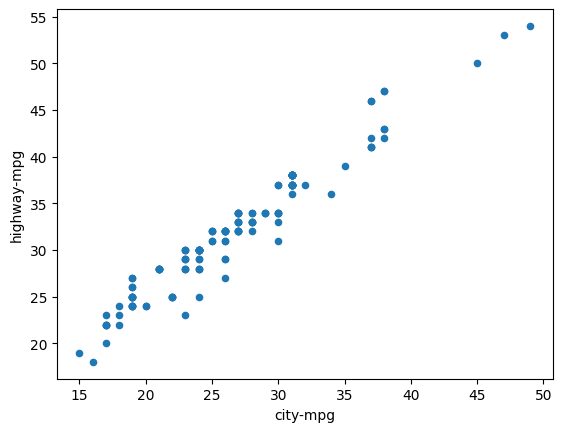

In [39]:
'BIVARIATE ANALYSIS'
var = "city-mpg"
sns.displot(df[df['city-mpg']>150], x="highway-mpg", hue=var, kind="kde",  multiple="stack")

data = pd.concat([df['highway-mpg'], df[var]], axis=1)

data.plot.scatter(x=var, y='highway-mpg');

In [38]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
model                  int64
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
age                    int64
dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


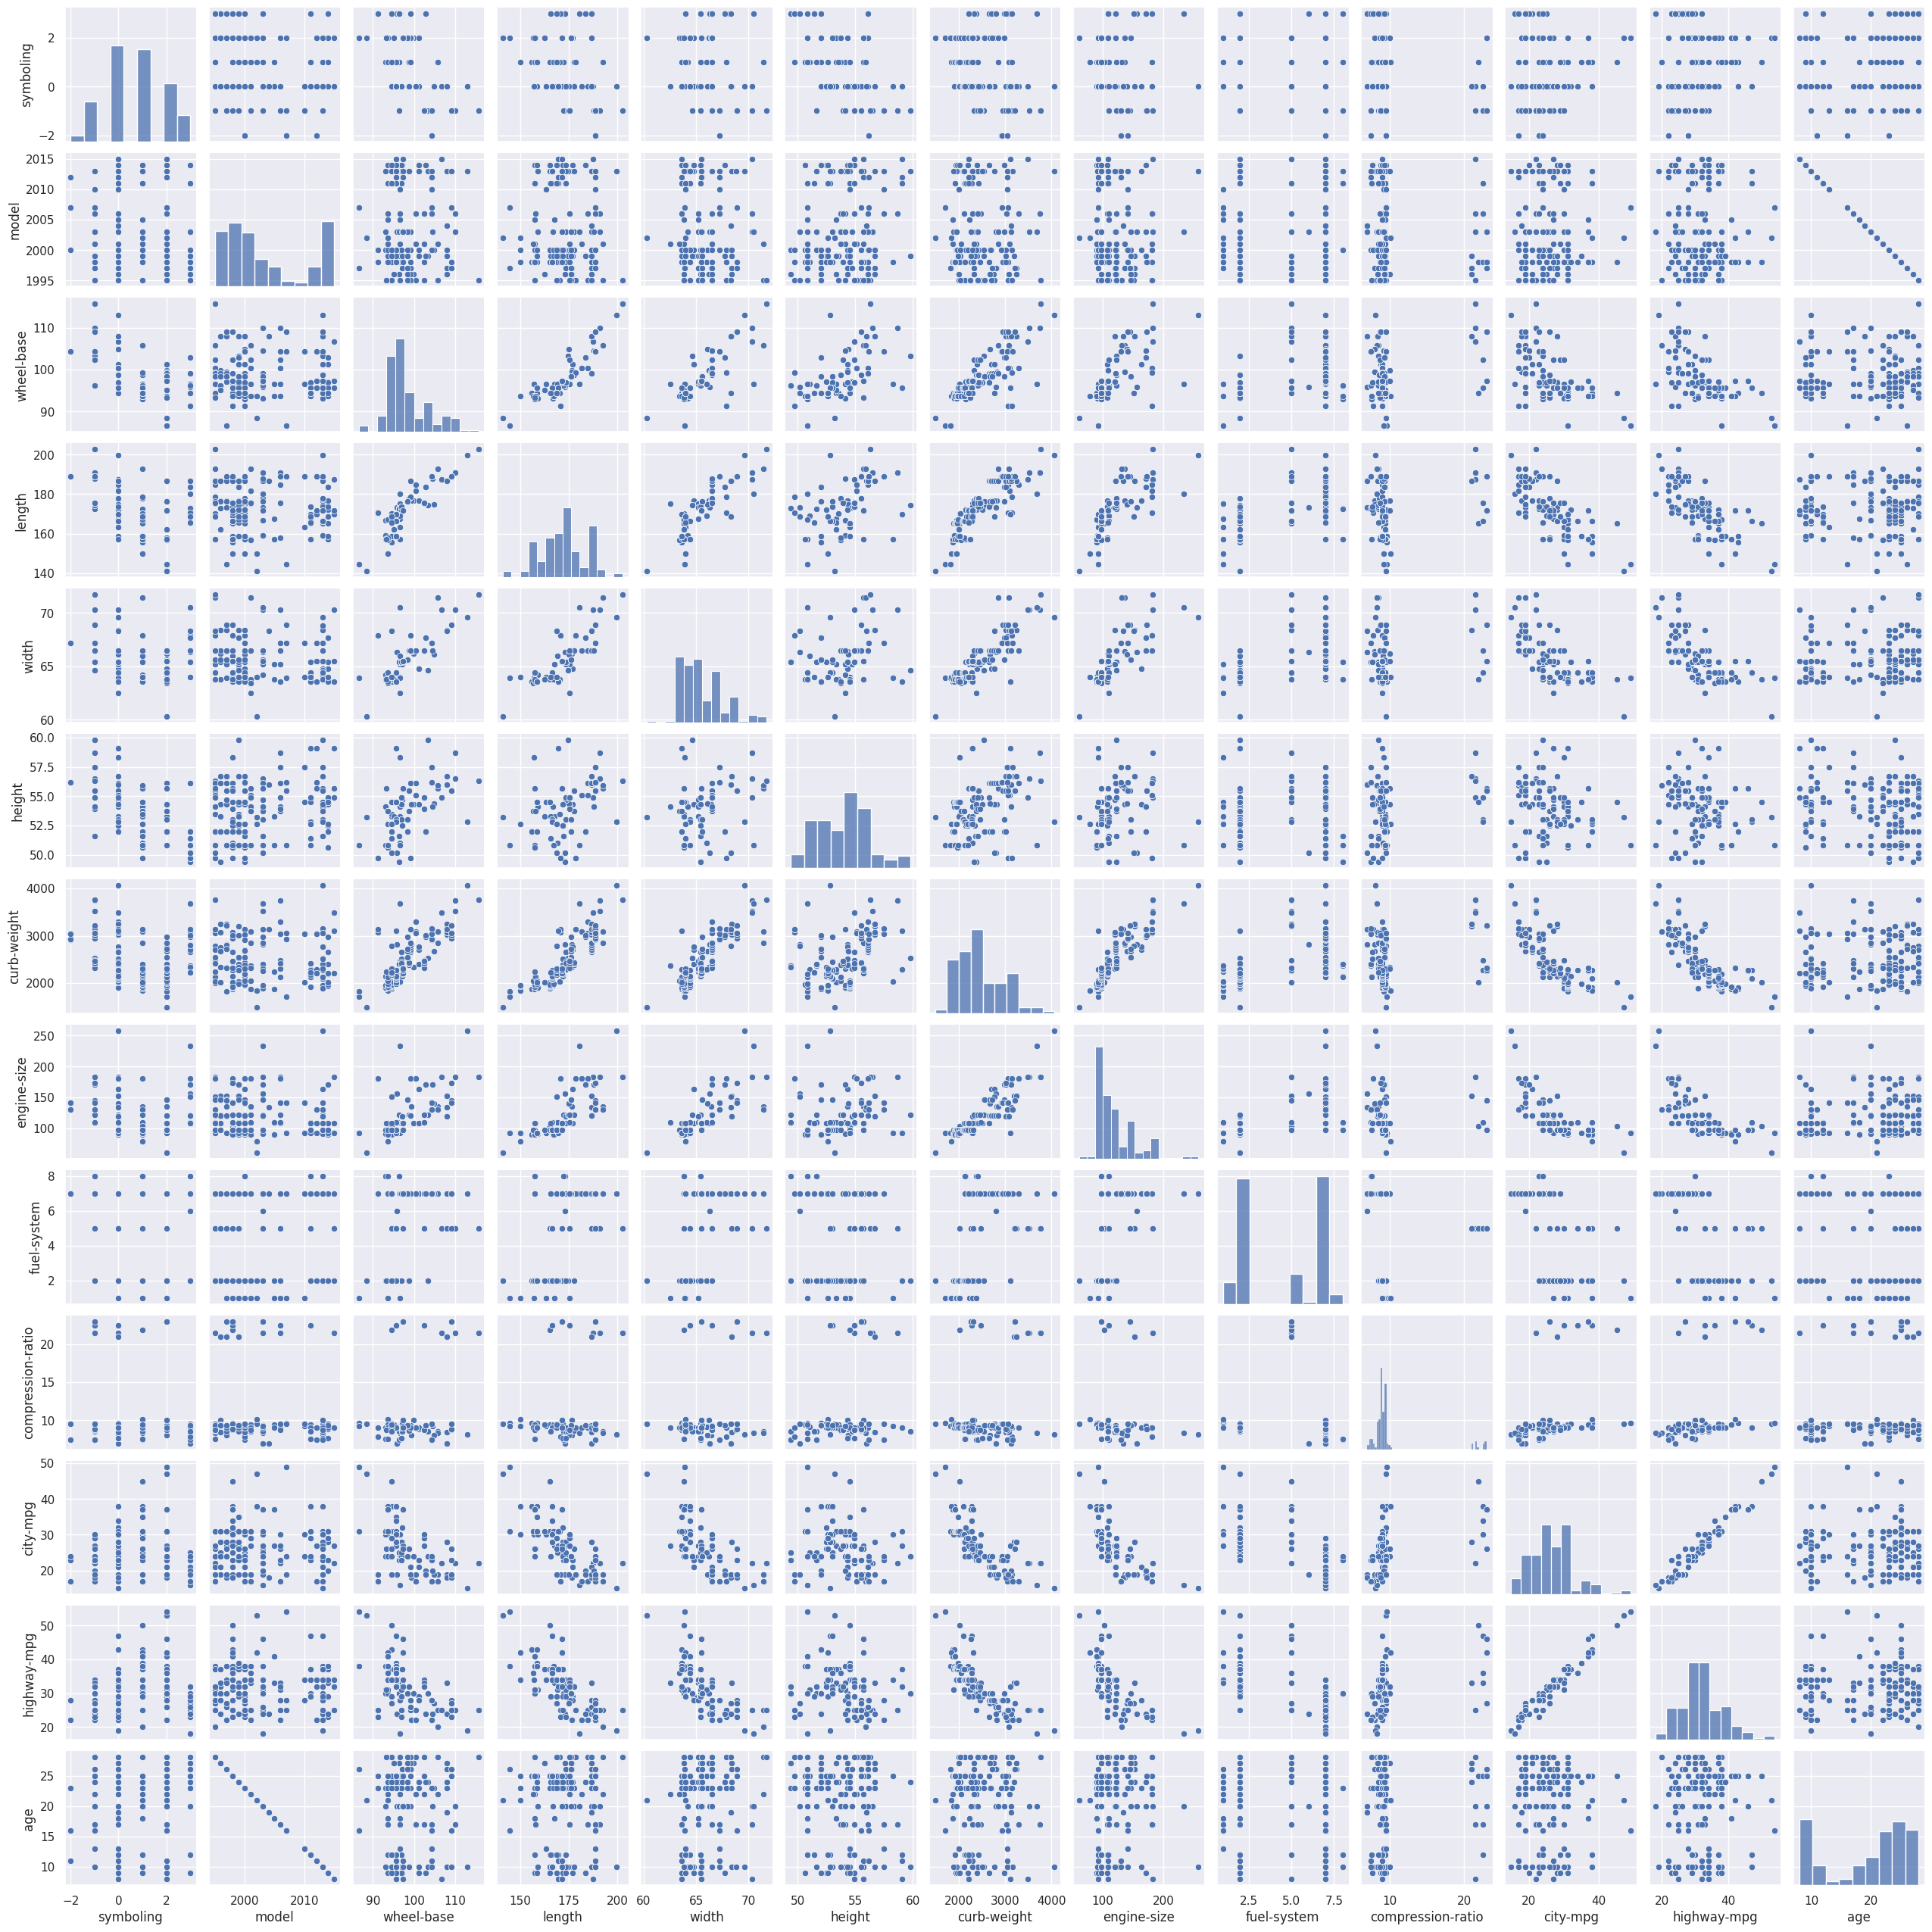

In [45]:
#  Plot pairwise relationships
sns.set()
sns.pairplot(df, size = 2.0)
plt.show()

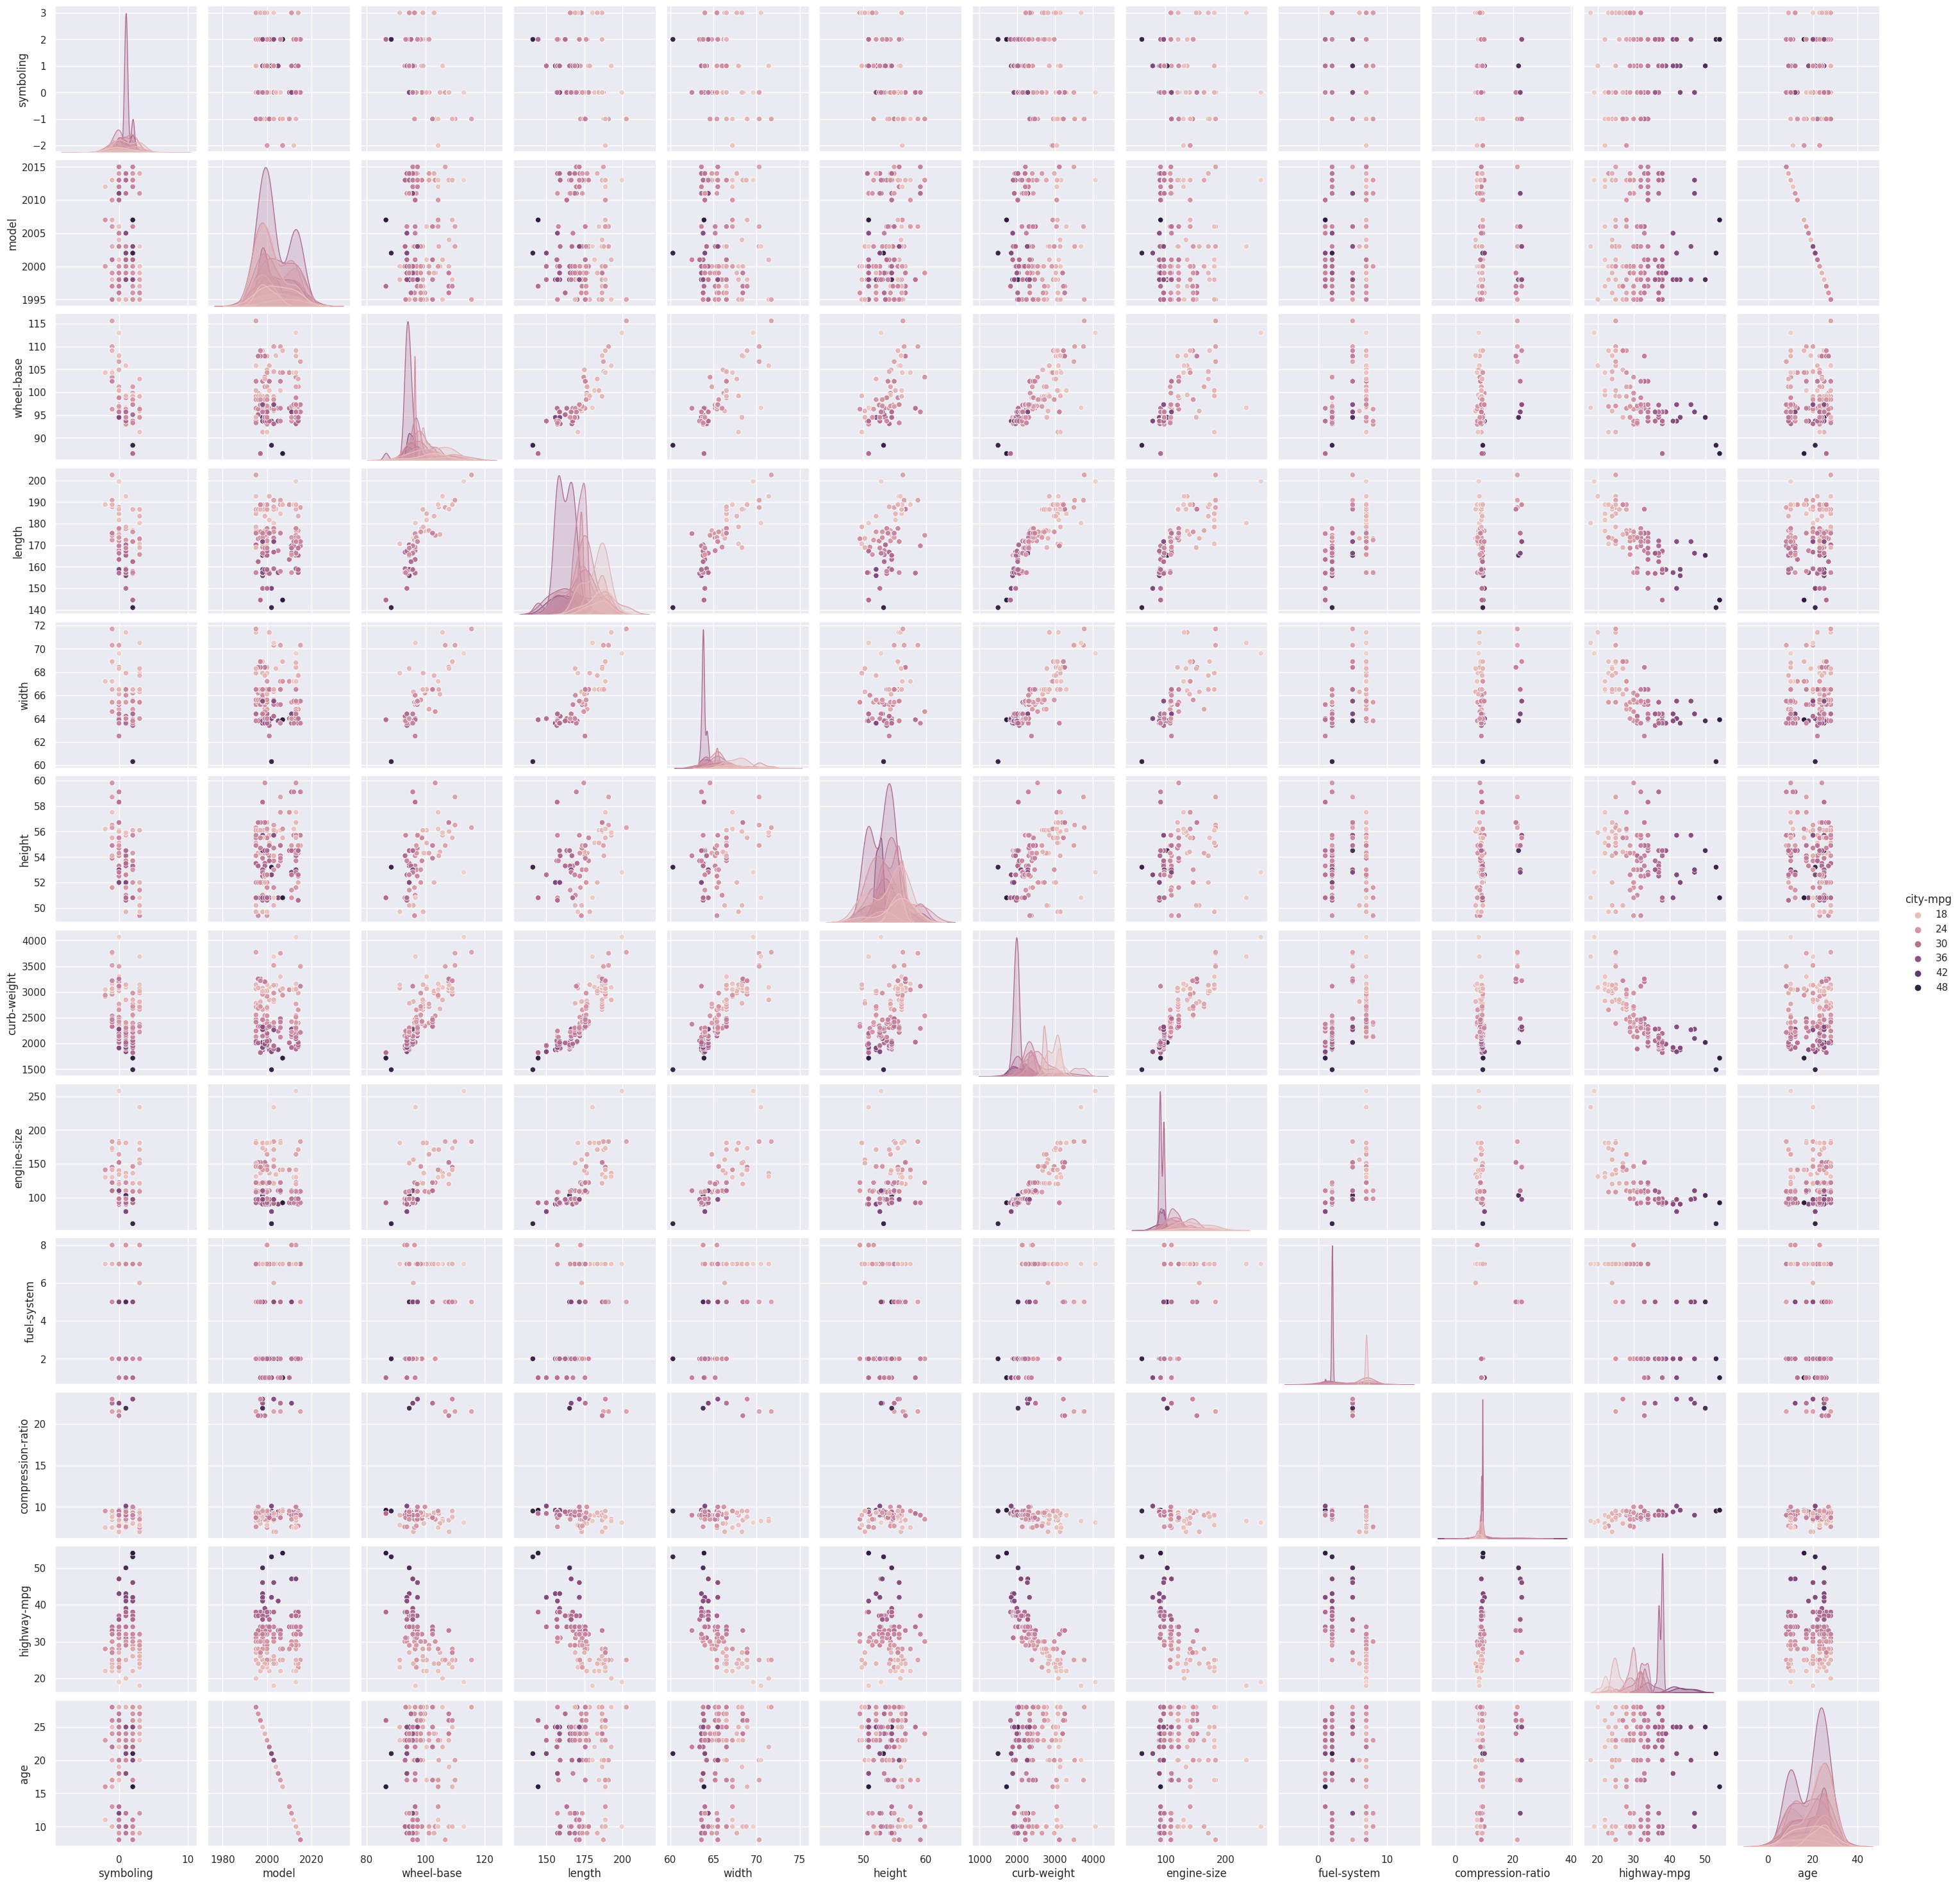

In [47]:
sns.pairplot(df, hue="city-mpg")

In [ ]:
#Seaborn objects Bar
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(df)

# Set the plot title and axis labels
plt.title('Bar Plot')
plt.xlabel('Horsepower')
plt.ylabel('Peak-rpm')

plt.show()

<Axes: >

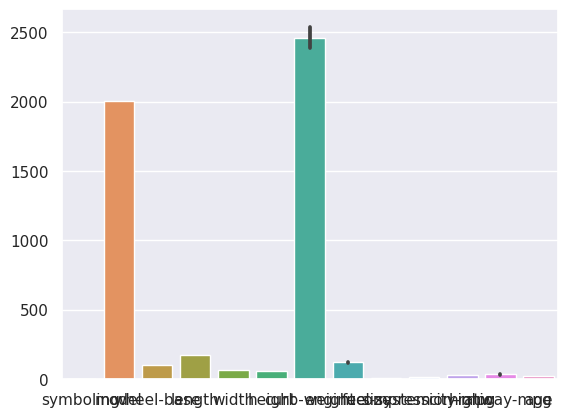

In [61]:
sns.barplot(df)

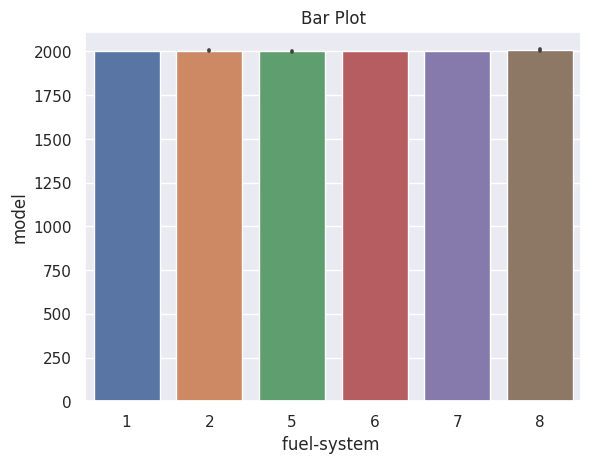

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a bar plot using a specific column
sns.barplot(x='fuel-system', y='model', data=df)

# Set the plot title and axis labels
plt.title('Bar Plot')
plt.xlabel('fuel-system ')
plt.ylabel('model')

# Show the plot
plt.show()


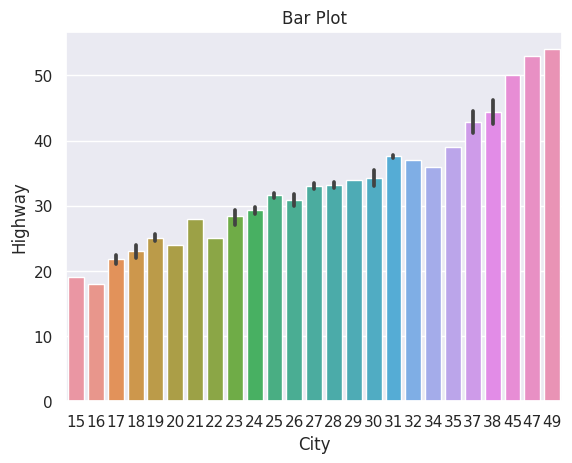

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a bar plot using a specific column
sns.barplot(x='city-mpg', y='highway-mpg', data=df)

# Set the plot title and axis labels
plt.title('Bar Plot')
plt.xlabel('City')
plt.ylabel('Highway')

# Show the plot
plt.show()

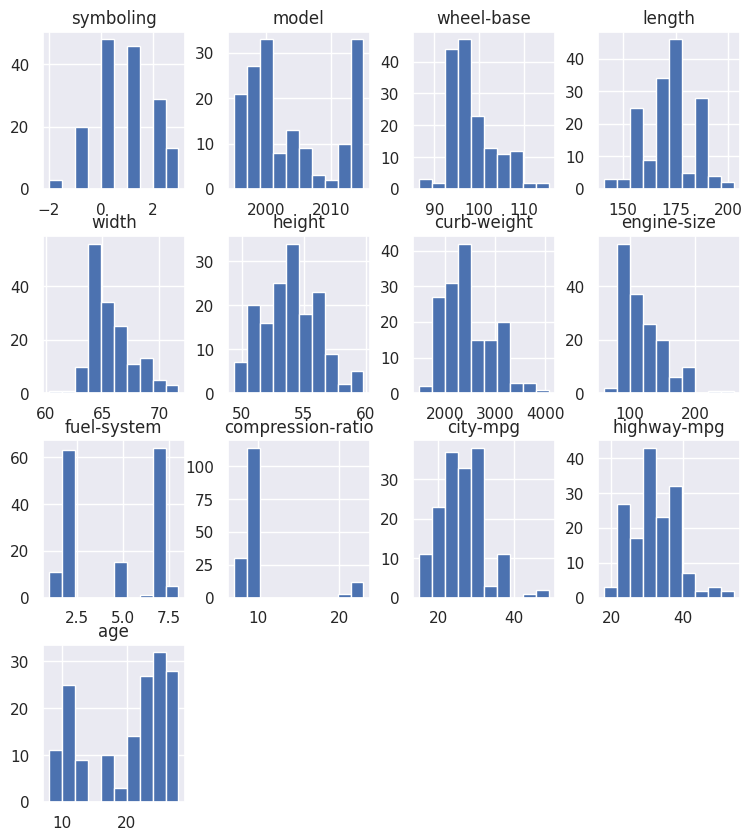

In [71]:
numerics = ['int64', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.hist(figsize=[9,10])
plt.show()